Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now you have the measurements of the iris flowers according to
their species, and here you train a machine learning model that can learn from the
measurements of the iris species and classify them.

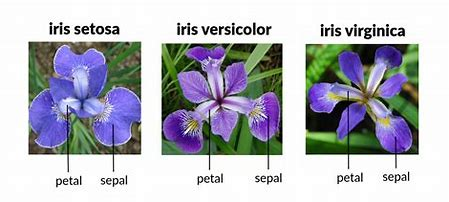

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/iris-flower/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df=df.drop(['Id'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns.unique()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

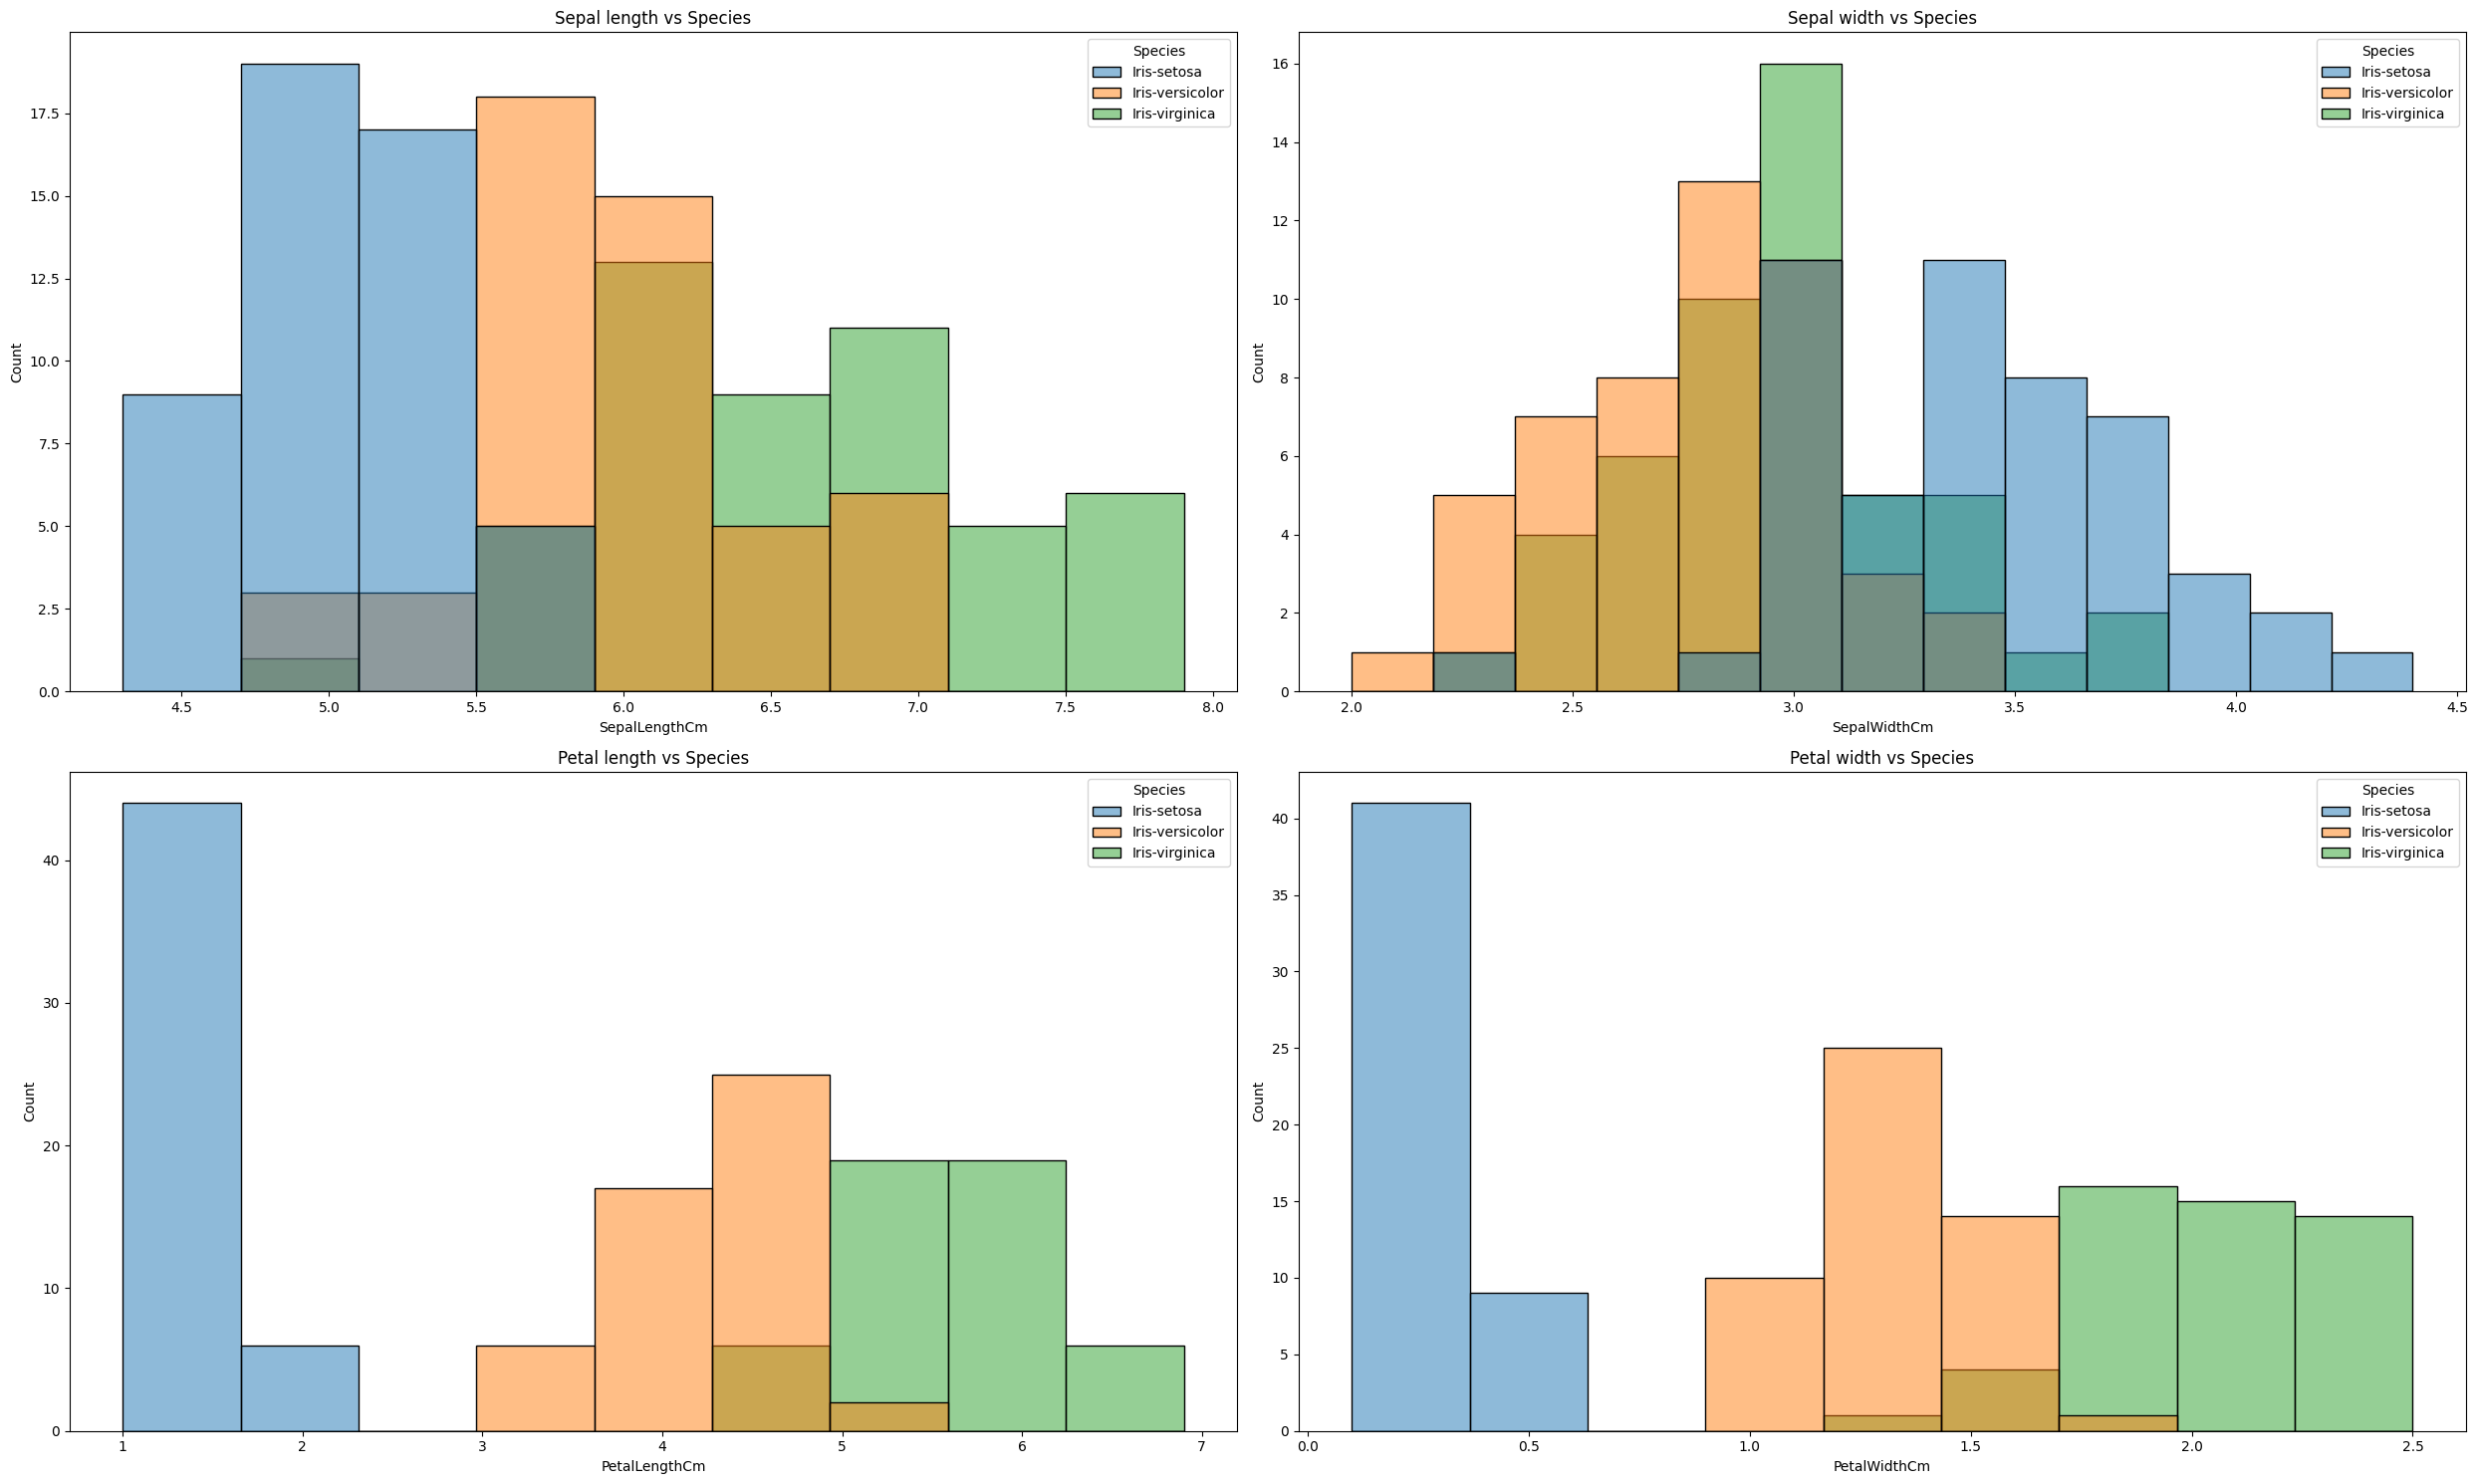

In [10]:
plt.figure(figsize=(25,15)) 
def graph(z):
    plt.subplot(2,2,z)
    plt.title('Sepal length vs Species')
    sns.histplot(data=df,x='SepalLengthCm',hue='Species')
    
    plt.subplot(2,2,z+1)
    plt.title('Sepal width vs Species')
    sns.histplot(data=df,x='SepalWidthCm',hue='Species')
    
    plt.subplot(2,2,z+2)
    plt.title('Petal length vs Species')
    sns.histplot(data=df,x='PetalLengthCm',hue='Species')
    
    plt.subplot(2,2,z+3)
    plt.title('Petal width vs Species')
    sns.histplot(data=df,x='PetalWidthCm',hue='Species')


   
graph(1)
plt.tight_layout()

Plotting a heatmap of correlation matrix

<Axes: >

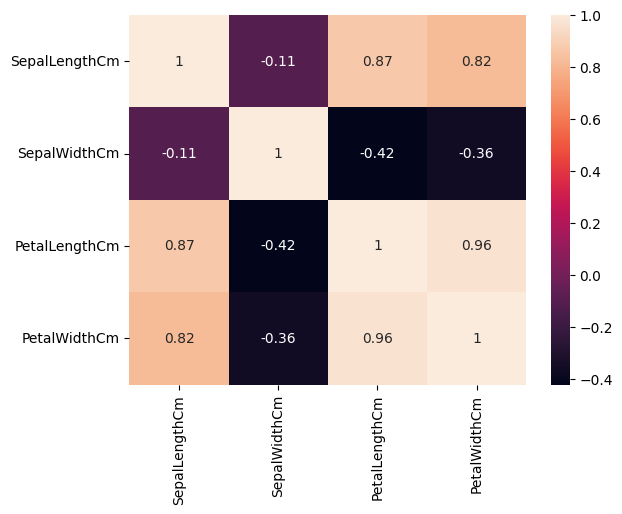

In [11]:
df1=df.drop(['Species'],axis=1)

htmap=df1.corr()
sns.heatmap(data=htmap,annot=True)

Lets plot a pairplot

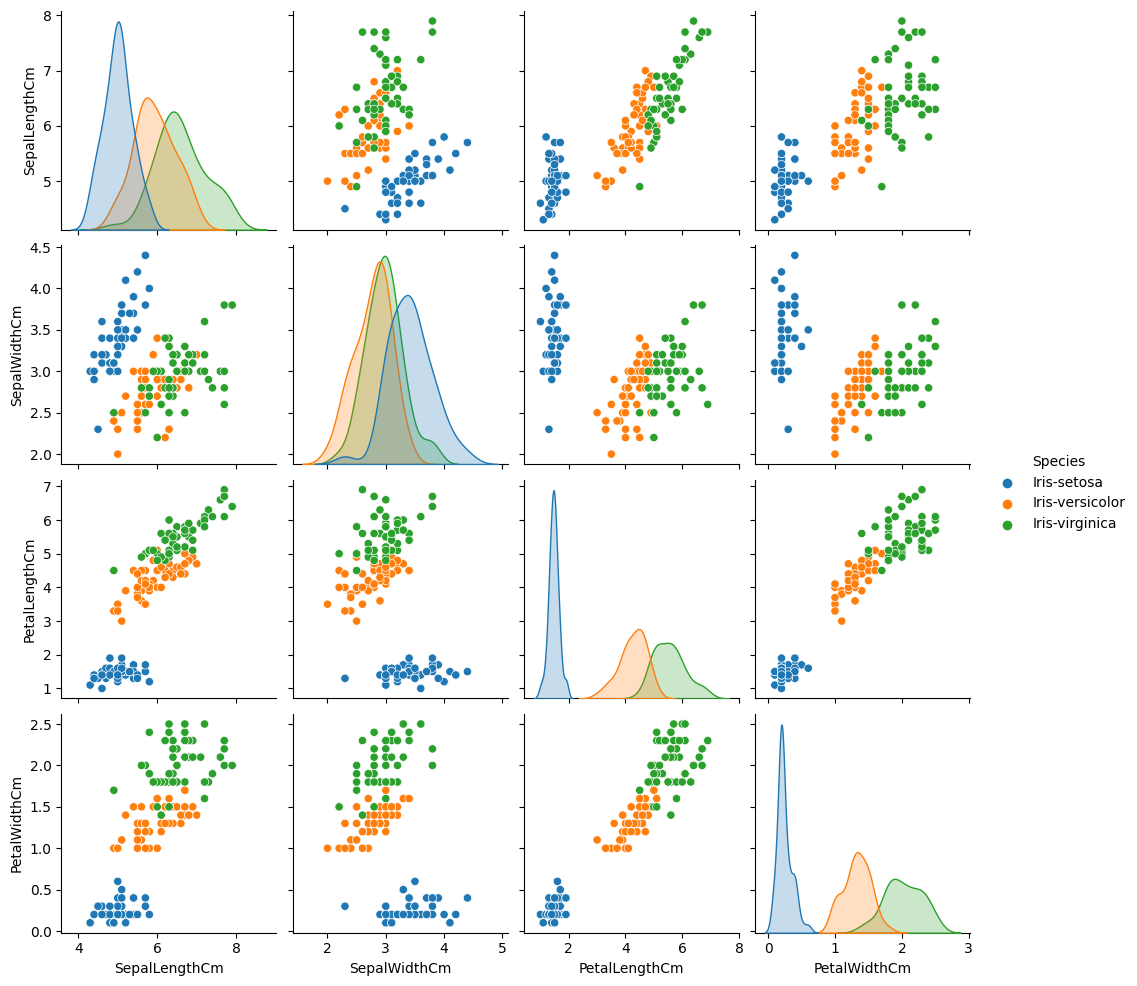

In [12]:
sns.pairplot(data=df,hue='Species')

Now, dividing the data for training model 

In [13]:
y=df['Species']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [14]:
X=df.drop(['Species'],axis=1)

In [15]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

We'll use Logistic Regression model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred))) 
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)



ConfusionMatrix:
 [[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]
Logistic Regression model accuracy (in %): 93.33333333333333


We are getting an accuracy of 96.66 % 
Lets check with Random Forest model

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', max_depth=2)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('ConfusionMatrix:\n {}' .format(confusion_matrix(y_test, y_pred)))
print('Random Forest model accuracy is : {}' .format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrix:
 [[12  0  0]
 [ 0  8  1]
 [ 0  1  8]]
Random Forest model accuracy is : 93.33333333333333


With logistic regression we are getting and accuracy of 96.66 % but with Random Forest model 93.33 %